## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)



`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#obtain data from .csv
df=pd.read_csv('./ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
n_rows = df.shape[0]
n_rows

294478

c. The number of unique users in the dataset.

In [4]:
nu_users = df['user_id'].nunique()
nu_users

290584

d. The proportion of users converted.

In [5]:
converted = df['converted'].mean()
converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
np_treat_nl = df.query('landing_page != "new_page" and group == "treatment"').append(df.query('landing_page == "new_page" and group != "treatment"'))
np_treat_nl_count = np_treat_nl.count()[0]
np_treat_nl_count

3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


*No missing values occur*

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df.query('landing_page == "new_page" and group == "treatment"').append(df.query('landing_page == "old_page" and group == "control"'))
df2.count()[0]

290585

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [9]:
df2_unique = df2['user_id'].nunique()
df2_unique

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
df2.user_id.duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [11]:
df2.loc[df2.user_id.duplicated()==True,:]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
index_dup = df2.loc[df2.user_id.duplicated()==True,:].index[0]
index_dup

2893

In [13]:
df2.drop(index_dup, inplace = True)

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
p_cont = df2.query('group == "control"').converted.mean()
p_cont

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
p_treat = df2.query('group == "treatment"').converted.mean()
p_treat 

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
df2.query('landing_page == "new_page"').count()[0] / df2.count()[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the obtained results we cannot say that we have enough evidence to say that the new treatment page leads to more conversions. We need to do the hypothesis testing to find the evidence to make such conclusions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  



These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.
 
The Null and Alternative Hypotheses are:
$$ H_0: p_{new} - p_{old} = 0 $$
$$ H_1: p_{new} - p_{old} \neq 0 $$
$$ \alpha = 0.05 $$

**Put your answer here.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
p_new = df2.converted.mean() 
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [21]:
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$?

In [22]:
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = df2.sample(n_new, replace = True)
new_page_converted.head()

,user_id,timestamp,group,landing_page,converted
229219,923093,2017-01-03 07:53:57.850649,control,old_page,0
92484,907086,2017-01-21 09:40:59.061285,treatment,new_page,0
92384,885934,2017-01-05 05:58:24.811827,treatment,new_page,0
51089,899557,2017-01-14 20:07:28.098062,treatment,new_page,0
217829,704069,2017-01-20 20:08:00.778420,control,old_page,0


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = df2.sample(n_old, replace = True)
old_page_converted.head()

,user_id,timestamp,group,landing_page,converted
145817,937232,2017-01-13 09:27:48.872352,control,old_page,0
40889,757933,2017-01-13 09:48:39.697743,treatment,new_page,0
189086,679154,2017-01-13 18:27:20.772787,control,old_page,0
201394,705830,2017-01-08 05:41:11.966962,treatment,new_page,0
108093,922985,2017-01-14 08:04:21.969366,treatment,new_page,1


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
p_new_sim = new_page_converted.converted.mean()
p_old_sim = old_page_converted.converted.mean()
p_new_sim - p_old_sim

0.0004935696834907632

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:

p_diffs = []
for i in range(10000):
    new_page_converted = df2.sample(n_new, replace = True)
    old_page_converted = df2.sample(n_old, replace = True)
    p_new = new_page_converted.converted.mean()
    p_old = old_page_converted.converted.mean()    
    p_diffs.append(p_new-p_old)
    if i % 300 == 0: # check for a running loop
        print(i)


0
300
600
900
1200
1500
1800
2100
2400
2700
3000
3300
3600
3900
4200
4500
4800
5100
5400
5700
6000
6300
6600
6900
7200
7500
7800
8100
8400
8700
9000
9300
9600
9900


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

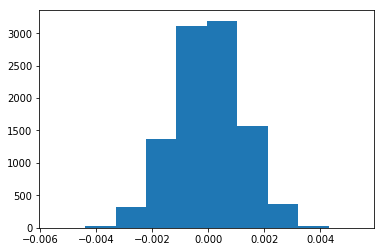

In [27]:
plt.hist(p_diffs);

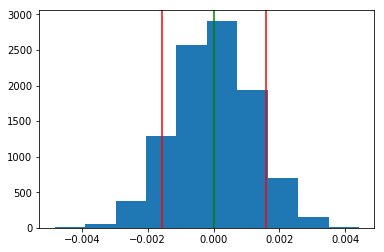

In [28]:
p_diff_data = df.query('group == "treatment" and landing_page == "new_page"').converted.mean() - \
df2.query('group == "control" and landing_page == "old_page"').converted.mean()
p_null = 0
null_vals = np.random.normal(p_null, np.std(p_diffs), 10000)

plt.hist(null_vals);
plt.axvline(p_null, color = 'green');
plt.axvline(p_diff_data, color = 'red');
plt.axvline(p_null + (p_null - p_diff_data), color = 'red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
(null_vals < p_diff_data).mean() + (null_vals > (p_null + (p_null - p_diff_data))).mean()

0.1876

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The P-value was computed. It is a probability of obtaining our data from the Null hypothysis given that H0 is true. Because the p-values is significantly large and, therefore, it is larger than $alpha = 0.05$ we have evidance that with type I error rate 5% that a new page is not better than old one**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').converted.sum()
convert_new = df2.query('landing_page == "new_page"').converted.sum()
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Because the obtained z-score is less than 1.96 we can say that there is evedence that the null hypothesis is not rejected. Moreover, the obtained p-value in proportions_ztest support this statement. The p-value from proportions_ztest is only 0.0078 lower compare to p-value from j. and k.steps. So, one can say that the obtained p-value from the simulatin agrees with the p-value from the built-in function. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
df2[['ab_page', 'old_page' ]] = pd.get_dummies(df2['landing_page'])
df2['intercept'] = 1
df2.head(), df2.tail()

(   user_id                   timestamp      group landing_page  converted  \
 2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
 3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
 6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1   
 8   817355  2017-01-04 17:58:08.979471  treatment     new_page          1   
 9   839785  2017-01-15 18:11:06.610965  treatment     new_page          1   
 
    ab_page  old_page  intercept  
 2        1         0          1  
 3        1         0          1  
 6        1         0          1  
 8        1         0          1  
 9        1         0          1  ,
         user_id                   timestamp    group landing_page  converted  \
 294471   718310  2017-01-21 22:44:20.378320  control     old_page          0   
 294473   751197  2017-01-03 22:28:38.630509  control     old_page          0   
 294474   945152  2017-01-12 00:51:57.078372  control     old_page          

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [33]:
import statsmodels.api as sm
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

results = logit_mod.fit();
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 12 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        10:22:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [34]:
1/np.exp(-0.0357)

1.036344896381825

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Let's interpret obtained results: 

1. For the ab_page dummy variable we can say that it is 1.0363 unlikely that user will choose a new page holding all other variables constant

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>

**Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

We can see that the obtained p-values for ab_page is almost the same as for hypothesis test in **Part II**. 

One can explain it as if our hypothesis for ab_page 

$$ H_0: \beta_1 = 0 $$
$$ H_1: \beta_1 \neq 0 $$ 
where $\beta_1$ is a regression coefficient.

If $\beta_1 =0$ then for any change alonge axis x the multiplitive coeffcient will be one. Because p-value is quite high and equil to 0.19 > $\alpha$ then we can say we have statistically sagnificant evidence to reject our alternative hypothesis let $\beta_1 =0$. Moreover, it corresponds to our $H_0$ hypothesis from **Part I**. 
$$ H_0: p_{new} - p_{old} = 0 $$
$$ H_1: p_{new} - p_{old} \neq 0 $$
$$ \alpha = 0.05 $$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [35]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**We can also consider factors as weekdays/weekends and time of the day such as morning, night, day or evening a user viewed the page. There would not be disadvantages unless a correlation occur between explanatory parameters.**

**I believe adding more explonatory variables increases the chances to create our model more accurate. However, it should not be overfitted. ** 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [37]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [38]:
### Create the necessary dummy variables
df_new[['ab_page', 'old_page' ]] = pd.get_dummies(df_new['landing_page'])
df_new[['UK','US','CA']]=pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
### Fit Your Linear Model And Obtain the Results

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])

results = logit_mod.fit();
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 12 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        10:22:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
US             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [41]:
1/np.exp(-0.0149), 1/np.exp(-0.0408), np.exp(0.0099)

(1.0150115583846535, 1.0416437559600236, 1.0099491671175422)

To sum up, we can say that:

1. For the UK dummy variable, it is 1.042 times unlikely that a user will be converted to the new web page than in CA,  holding all other variables constant.

2. For the US dummy variable, it is 1.001 times likely that a used will be converted to the new web page than in CA. Moreover, because 1.001 is close to one, we can say it is as likely for UK as for CA, holding all other variables constant.    

3. For the ab_page dummy variable we can say that it is 1.015 unlikely that user will choose a new page holding all other variables constant. One can notice that this value decreased compare to the value in **Part III b.** on 0.0213. I believe that this is due to the fact that we are taling into account countries for conversion.  

<a id='conclusions'></a>
## Conclusions

Based on the provided dataset the hypothesis test has been completed to define either a new page or an old one is better. So, from the obtained evidenes we rejected a new page and kept the old one. 

Secondly, we completed the Logistic regression where we supported our results using the mulitplicative coefficient for ab_page dummy variable as well as using its p-value.

Thirdly, three countries were added to the Logistic regression and we obtain multiplicative coefficients for them as well along with ab_page coefficeint.  

Finally, we can say that there is not only an absence of statistical sagnificance to use a new page, but also the practical sagnificance is not presented due to the expences which might occur due to the creation of the web-site, developing its new SEO and other promotion on the net.  

### Resources

1. Lectures 
2. Python, Numpy, Pandas, statsmodels documentation
3. z-test: http://knowledgetack.com/python/statsmodels/proportions_ztest/

#### Prepared by Boris Kushnarev for Udacity Data Analyst Nanodegree class. 



### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.